## simulating investment statergy lable

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading user data
user_df = pd.read_csv('user_data.csv')
user_df.head()

,Financial Goal,Risk Tolerance,Investment Horizon
0,59599,High,Short
1,95465,Low,Long
2,18484,Low,Medium
3,65618,Low,Long
4,30190,Low,Medium


In [3]:
# encoding categorical values
label_encoder_risk = LabelEncoder()
label_encoder_horizon = LabelEncoder()

In [4]:
# Encode Risk Tolerance
user_df['Risk Tolerance'] = label_encoder_risk.fit_transform(user_df['Risk Tolerance'])

In [5]:
# Encode Investment Horizon
user_df['Investment Horizon'] = label_encoder_horizon.fit_transform(user_df['Investment Horizon'])

In [6]:
user_df.head()

,Financial Goal,Risk Tolerance,Investment Horizon
0,59599,0,2
1,95465,1,0
2,18484,1,1
3,65618,1,0
4,30190,1,1


In [7]:
# function to assign investment strategy
def assign_investment_strategy(row):
    financial_goal = row['Financial Goal']
    risk_tolerance = row['Risk Tolerance']  
    investment_horizon = row['Investment Horizon'] 

    if risk_tolerance == 0:  # High = 0
        if investment_horizon == 2:  # Short = 2
            return 'Aggressive'
        elif investment_horizon == 1:  # Medium = 1
            return 'Moderately Aggressive'
        elif investment_horizon == 0:  # Long = 0
            return 'Moderately Aggressive'

    elif risk_tolerance == 2:  # Medium = 2
        if investment_horizon == 0:  # Long
            return 'Balanced' if financial_goal > 40000 else 'Moderately Aggressive'
        elif investment_horizon == 1:  # Medium
            return 'Balanced' if financial_goal > 40000 else 'Moderately Aggressive'
        elif investment_horizon == 2:  # Short
            return 'Moderately Aggressive'

    elif risk_tolerance == 1:  # Low = 1
        if financial_goal < 20000:
            return 'Very Conservative'
        else:
            return 'Conservative'

    return 'Balanced'  # Default case

In [8]:
# applying the function to the user data
user_df['Investment Strategy'] = user_df.apply(assign_investment_strategy, axis=1)

In [9]:
user_df[['Financial Goal', 'Risk Tolerance', 'Investment Horizon', 'Investment Strategy']].head()

,Financial Goal,Risk Tolerance,Investment Horizon,Investment Strategy
0,59599,0,2,Aggressive
1,95465,1,0,Conservative
2,18484,1,1,Very Conservative
3,65618,1,0,Conservative
4,30190,1,1,Conservative


## Model

In [10]:
# defining features (X) and target (y)
X = user_df[['Financial Goal', 'Risk Tolerance', 'Investment Horizon']]  # Features
y = user_df['Investment Strategy']  # Target variable

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# random forest algo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# traning the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                        precision    recall  f1-score   support

           Aggressive       1.00      1.00      1.00        41
             Balanced       1.00      1.00      1.00        42
         Conservative       1.00      1.00      1.00        93
Moderately Aggressive       1.00      1.00      1.00       113
    Very Conservative       1.00      1.00      1.00        11

             accuracy                           1.00       300
            macro avg       1.00      1.00      1.00       300
         weighted avg       1.00      1.00      1.00       300



In [16]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


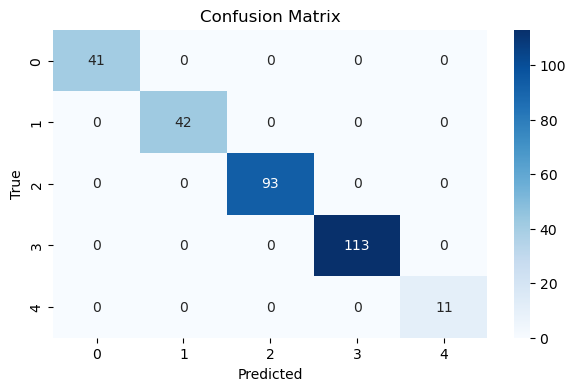

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Making predictions

In [19]:
# new set of user profiles for prediction
new_user_profiles = pd.DataFrame({
    'Financial Goal': [30000, 100000, 50000],
    'Risk Tolerance': [0, 2, 1],  # 1 = Low, 2 = Medium, 0 = High
    'Investment Horizon': [0, 2, 1]  # 2 = Short, 1 = Medium, 0 = Long
})

In [20]:
# using the trained model to make predictions
predictions = model.predict(new_user_profiles)

In [21]:
# predictions
print("Predicted Investment Strategies for New Users:")
print(predictions)

Predicted Investment Strategies for New Users:
['Moderately Aggressive' 'Moderately Aggressive' 'Conservative']


In [22]:
# Predicting strategies for new user profiles
new_user_profiles['Investment Strategy'] = new_user_profiles.apply(assign_investment_strategy, axis=1)

predicted_strategies = new_user_profiles['Investment Strategy'].values
print("Predicted Investment Strategies for New Users:")
print(predicted_strategies)


Predicted Investment Strategies for New Users:
['Moderately Aggressive' 'Moderately Aggressive' 'Conservative']


## Feature importance

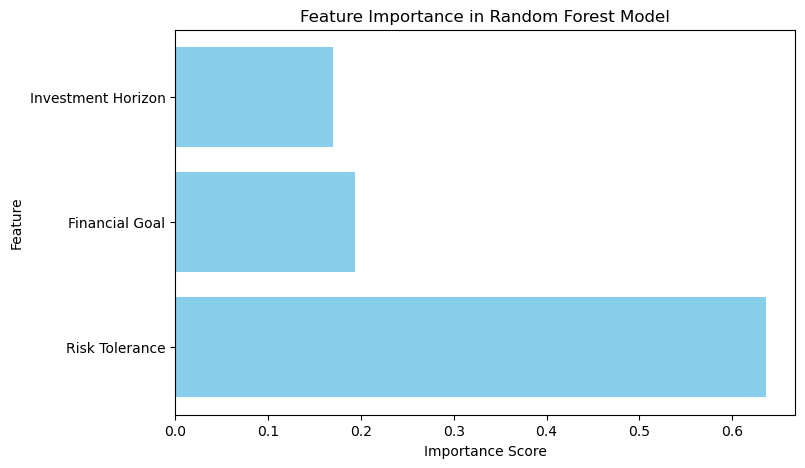

              Feature  Importance
1      Risk Tolerance    0.635867
0      Financial Goal    0.194149
2  Investment Horizon    0.169985


In [23]:
# getting feature importance scores
feature_importances = model.feature_importances_

# creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# plotting feature importances
plt.figure(figsize=(8, 5))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# previewing feature importance DataFrame
print(features_df)